In [ ]:
# You must include a written description of three observable trends based on the data.

# See PPT.`

In [9]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_complete = pd.merge(ride_data, city_data, how="left", on=["city"])

# Display the data table for preview

pyber_complete.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


## Bubble Plot of Ride Sharing Data

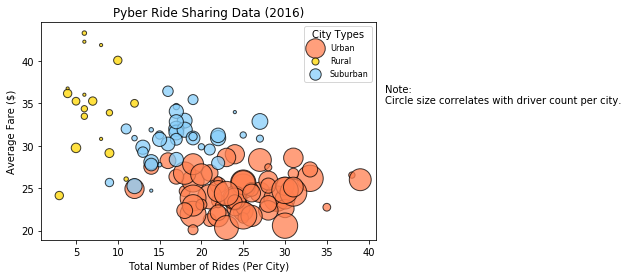

In [16]:
# Obtain the x and y coordinates for each of the three city types

#city types are urban, rural, and suburban

urban_city = pyber_complete[pyber_complete["type"] == "Urban"].groupby([pyber_complete["city"]])

rural_city = pyber_complete[pyber_complete["type"] == "Rural"].groupby([pyber_complete["city"]])

suburban_city = pyber_complete[pyber_complete["type"] == "Suburban"].groupby([pyber_complete["city"]])



# Build the scatter plots for each city types

xaxis_urban = urban_city["ride_id"].count()
yaxis_urban = urban_city["fare"].mean()
s_urban = urban_city["driver_count"].mean()

xaxis_rural = rural_city["ride_id"].count()
yaxis_rural = rural_city["fare"].mean()
s_rural = rural_city["driver_count"].mean()

xaxis_suburban = suburban_city["ride_id"].count()
yaxis_suburban = suburban_city["fare"].mean()
s_suburban = suburban_city["driver_count"].mean()



# Finally building scatter plot

plt.scatter(xaxis_urban, yaxis_urban, label= "Urban", s=s_urban * 10, color=["coral"], edgecolor="black", 
            alpha = 0.75, marker = "o")

plt.scatter(xaxis_rural, yaxis_rural, label= "Rural", s=s_rural * 10, color=["gold"], edgecolor="black", 
            alpha = 0.75, marker = "o")

plt.scatter(xaxis_suburban, yaxis_suburban, label= "Suburban", s=s_suburban * 10, color=["lightskyblue"], 
            edgecolor="black", alpha = 0.75, marker = "o")



# Incorporate the other graph properties -- Really formatting the plot

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")



# Create a legend

legend = plt.legend(fontsize = 8, title = "City Types", loc="best")



# Incorporate a text label regarding circle size

plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)



# Save Figure

#plt.savefig("Documents/PyberRideSharingData.png", bbox_inches="tight") -- Need to figure out how to save

plt.show()

## Total Fares by City Type

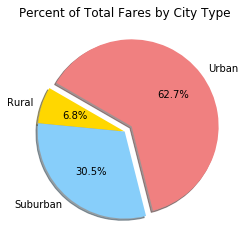

In [21]:
# Calculate Type Percents

type_percents = pyber_complete.groupby(['type'])

fare_sum = type_percents['fare'].sum()


# Build Pie Chart

explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]

plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("Percent of Total Fares by City Type")

#labels = ["Rural". "Suburban", "Urban"]
#colors = ["gold", "lightskyblue", "lightcoral"]
#labels = ["Rural". "Suburban", "Urban"]

# Save Figure

plt.show()

## Total Rides by City Type

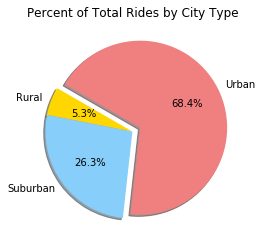

In [22]:
# Calculate Ride Percents

# remember you already created a group by "type_percents"

ride_count = type_percents['ride_id'].count()


# Build Pie Chart

explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]

plt.pie(ride_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("Percent of Total Rides by City Type")

#labels = ["Rural". "Suburban", "Urban"]
#colors = ["gold", "lightskyblue", "lightcoral"]
#labels = ["Rural". "Suburban", "Urban"]

# Save Figure

plt.show()

## Total Drivers by City Type

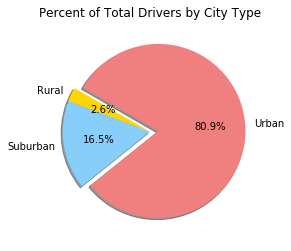

In [27]:
# Calculate Driver Percents

# remember type_percents
# My driver percentages were off when I first used the "type_percents" groupby...I realized that I needed
# to do another groupby for driver by city type

type_percents_drivers = city_data.groupby(['type'])
driver_total = type_percents_drivers['driver_count'].sum()

# Build Pie Chart

explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]

plt.pie(driver_total, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("Percent of Total Drivers by City Type")

#labels = ["Rural". "Suburban", "Urban"]
#colors = ["gold", "lightskyblue", "lightcoral"]
#labels = ["Rural". "Suburban", "Urban"]

# Save Figure

plt.show()